In [11]:
from os import listdir
from matplotlib import image
import random
import numpy as np

# load all images in a directory
np.random.RandomState(9)
random_indexes = np.random.choice(range(25000), 250)
loaded_images = list()
for i in range(250):
	# load image
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('mirflickr25k/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im9800.jpg (500, 190, 3)
> loaded im21095.jpg (500, 500, 3)
> loaded im218.jpg (500, 266, 3)
> loaded im7696.jpg (375, 500, 3)
> loaded im18259.jpg (500, 417, 3)
> loaded im3207.jpg (334, 500, 3)
> loaded im795.jpg (391, 500, 3)
> loaded im12913.jpg (500, 333, 3)
> loaded im20090.jpg (375, 500, 3)
> loaded im24540.jpg (500, 500, 3)
> loaded im9382.jpg (500, 334, 3)
> loaded im9574.jpg (381, 500, 3)
> loaded im2533.jpg (333, 500, 3)
> loaded im12206.jpg (375, 500, 3)
> loaded im19364.jpg (292, 500, 3)
> loaded im24846.jpg (348, 500, 3)
> loaded im10101.jpg (376, 500, 3)
> loaded im16185.jpg (332, 500, 3)
> loaded im3814.jpg (500, 500, 3)
> loaded im18933.jpg (333, 500, 3)
> loaded im5471.jpg (375, 500, 3)
> loaded im5480.jpg (333, 500, 3)
> loaded im20046.jpg (413, 500, 3)
> loaded im21415.jpg (375, 500, 3)
> loaded im12655.jpg (375, 500, 3)
> loaded im15690.jpg (500, 375, 3)
> loaded im2655.jpg (375, 500, 3)
> loaded im21813.jpg (500, 375, 3)
> loaded im23279.jpg (375, 500, 3)

> loaded im2791.jpg (375, 500, 3)
> loaded im6069.jpg (500, 400, 3)
> loaded im7975.jpg (333, 500, 3)
> loaded im2534.jpg (333, 500, 3)


In [12]:
#1.
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [13]:
RED = 0
GREEN = 1
BLUE = 2
#2.a Mat ochikuvannya i dispersiya 
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red: expected value (math. ochikuvanya) : {0:.2f}, dispersion : {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green: expected value (math. ochikuvanya) : {0:.2f}, dispersion : {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue: expected value (math. ochikuvanya) : {0:.2f}, dispersion : {1:.2f}"\
.format(M_blue, D_blue))

Red: expected value (math. ochikuvanya) : 109.15, dispersion : 6344.77
Green: expected value (math. ochikuvanya) : 101.70, dispersion : 5744.94
Blue: expected value (math. ochikuvanya) : 93.15, dispersion : 6225.48


In [14]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#2.d Asimmetriya, ekscess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Ekscess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2) - 3
Ekscess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2) - 3
Ekscess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2) - 3
print('Red: asymmetry - {0:.3f}, ekscess - {1:.3f}'\
.format(Asym_red, Ekscess_red))
print('Green: asymmetry - {0:.3f}, ekscess - {1:.3f}'\
.format(Asym_green, Ekscess_green))
print('Blue: asymmetry - {0:.3f}, ekscess - {1:.3f}'\
.format(Asym_blue, Ekscess_blue))

Red: asymmetry - 0.283, ekscess - -1.155
Green: asymmetry - 0.366, ekscess - -1.028
Blue: asymmetry - 0.544, ekscess - -0.956


In [15]:
#3. Gethering info vectors
Vector_A = np.array([np.array([M_red, D_red, Asym_red, Ekscess_red]),
                     np.array([M_green, D_green, Asym_green, Ekscess_green]),
                     np.array([M_blue, D_blue, Asym_blue, Ekscess_blue])])
print("Vector_A:\n" + str(Vector_A))
Vector_All_DATA = np.copy(Vector_A)
itear = 0
for image in loaded_images:
    image = np.reshape(image, (-1, 3))
    image = np.swapaxes(image, 0, 1)
    Vector_All_DATA = np.concatenate((Vector_All_DATA,image),axis=1)
    itear += 1
    if (itear % 10 == 0):
        print(str(itear) + " images")

Vector_A:
[[ 1.09149564e+02  6.34477215e+03  2.82942056e-01 -1.15495891e+00]
 [ 1.01700623e+02  5.74494173e+03  3.66298835e-01 -1.02813182e+00]
 [ 9.31520385e+01  6.22547844e+03  5.43842429e-01 -9.56083710e-01]]
10 images
20 images
30 images
40 images
50 images
60 images
70 images
80 images
90 images
100 images
110 images
120 images
130 images
140 images
150 images
160 images
170 images
180 images
190 images
200 images
210 images
220 images
230 images
240 images
250 images


In [16]:
#4. Gaussian models
P_x1 = np.random.normal(M_red, D_red, 1)
print("expected value + colors:\n" + str(P_x1))
P_x2 = np.cov(Vector_All_DATA)
print("expected value + dispersion + colors:\n" + str(P_x2[:2, :2]))
print("expected value + dispersion + asymmetry + colors:\n" + str(P_x2[:3, :3]))
print("expected value + dispersion + asymmetry + ekscess + colors:\n" + str(P_x2[:4, :4]))

expected value + colors:
[11712.77091714]
expected value + dispersion + colors:
[[6345.63611094 5264.20122769]
 [5264.20122769 5745.6493194 ]]
expected value + dispersion + asymmetry + colors:
[[6345.63611094 5264.20122769 4409.70467577]
 [5264.20122769 5745.6493194  5340.86506565]
 [4409.70467577 5340.86506565 6226.31387514]]
expected value + dispersion + asymmetry + ekscess + colors:
[[6345.63611094 5264.20122769 4409.70467577]
 [5264.20122769 5745.6493194  5340.86506565]
 [4409.70467577 5340.86506565 6226.31387514]]


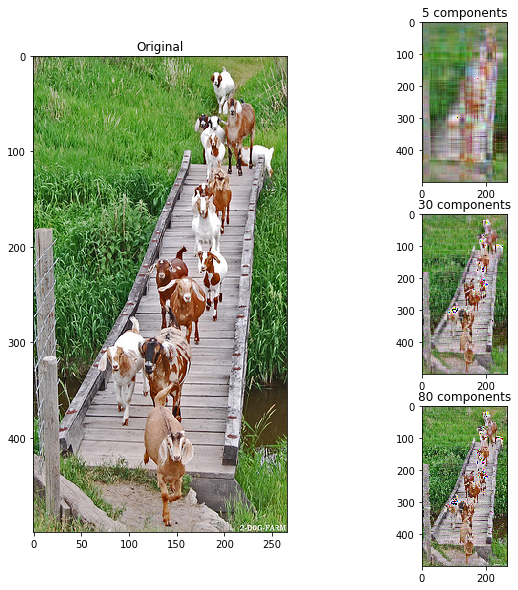

In [17]:
#5. a.Restoring using PCA
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

test_img = loaded_images[2]
a_np = np.array(test_img)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def PCA_2d(image_2d, numpc):
	cov_mat = image_2d - np.mean(image_2d)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
    
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d).T
	recon_img_mat = np.uint8(np.absolute(recon))
	return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 5), PCA_2d(a_g, 5), PCA_2d(a_b, 5)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('Original')
plt.imshow(loaded_images[2])
fig.add_subplot(3, 2, 2)
plt.title('5 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 30), PCA_2d(a_g, 30), PCA_2d(a_b, 30)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 4)
plt.title('30 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 80), PCA_2d(a_g, 80), PCA_2d(a_b, 80)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 6)
plt.title('80 components')
plt.imshow(recon_color_img)
plt.show()
# recon_color_img = Image.fromarray(recon_color_img)
# recon_color_img.show()

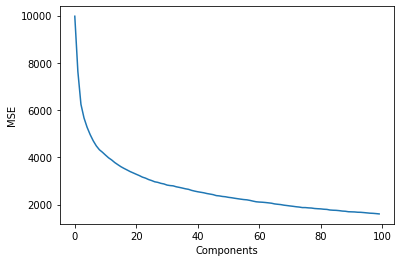

In [19]:
# b.calculating MSE
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

mse_list = list()
for i in range(100):
    a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, i), PCA_2d(a_g, i), PCA_2d(a_b, i)
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
    mse_list.append(mse(test_img, recon_color_img))
plt.plot(range(len(mse_list)),mse_list)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.show()

In [20]:
#6 Markov chain:

markov_matrix1 = np.zeros(shape=(256, 256))
#c-type
arr = a_r.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 1st oder:\n", markov_matrix)
print("\nRed matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix1 = np.zeros(shape=(256, 256))
#Fortran-type
arr = a_r.flatten('F')
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 2-nd type 1st oder:\n", markov_matrix)
print("\nRed matrix 2-nd type 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix2 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix2[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix2[0] / sum(markov_matrix2[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix2[i] / sum(markov_matrix2[i])))
print("\n\nGreen matrix 1st oder:\n", markov_matrix)
print("\nGreen matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix3 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix3[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix3[0] / sum(markov_matrix3[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix3[i] / sum(markov_matrix3[i])))
print("\n\nBlue matrix 1st oder:\n", markov_matrix)
print("\nBlue matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

Red matrix 1st oder:
 [[0.00294985 0.00589971 0.         ... 0.         0.         0.        ]
 [0.01282051 0.         0.         ... 0.         0.         0.        ]
 [0.01041667 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.11961722 0.16746411 0.215311  ]
 [0.         0.         0.         ... 0.09570957 0.1980198  0.17821782]
 [0.         0.         0.         ... 0.08163265 0.09105181 0.22291994]]

Red matrix 2nd order:
 [[5.09338420e-03 8.97927655e-04 1.51707202e-03 ... 5.23097312e-05
  1.61268123e-04 4.14854386e-04]
 [5.24400288e-03 1.34305199e-03 1.56642213e-03 ... 3.83645833e-05
  2.70519507e-04 7.93485752e-04]
 [5.79240434e-03 9.64267146e-04 1.34309489e-03 ... 2.95065792e-05
  2.15990898e-04 4.00926463e-04]
 ...
 [1.38859205e-04 2.60274372e-05 3.25454597e-05 ... 6.38340351e-02
  9.72716035e-02 1.65832111e-01]
 [9.02749673e-05 2.22686400e-05 4.49283385e-05 ... 6.41013847e-02
  1.00274964e-01 1.69159215e-01]
 [2.911418

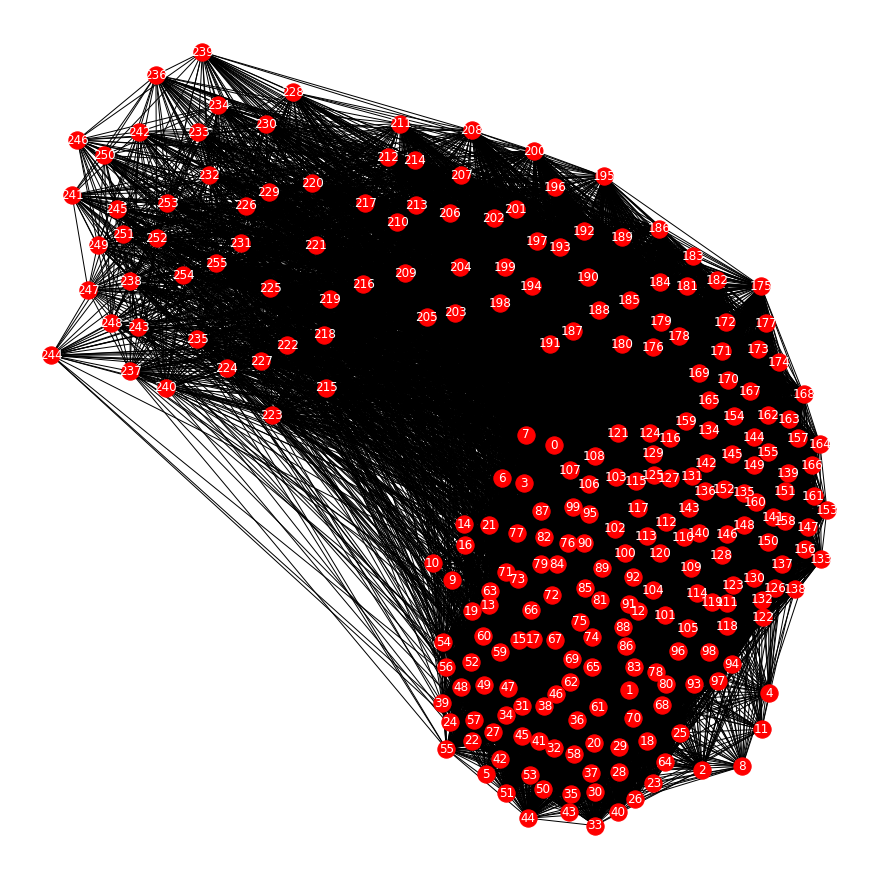

In [21]:
#Graph
import networkx as nx
import pandas as pd

data = markov_matrix
data = np.triu(data) + np.triu(data).T
ind = [str(i) for i in range(data.shape[0])]
df2 = pd.DataFrame(data, index=ind, columns=ind)
plt.figure(1,figsize=(12,12))  
G2 = nx.from_pandas_adjacency(df2)

nx.draw(G2, with_labels=True, node_color='red', font_color='white')
plt.show()